<a href="https://colab.research.google.com/github/LaraSofiaLopes/Numerical-Analysis/blob/master/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab8**
### Lara Lopes

### **Task 1**

f(x) = x^2 

Interval from a=1 to b=4

a) Rectangles - function value from the left side:
          
      I4 = sum((ni-ni-1)*f(ni-1), i=1:n
      I4 = (1-0)*f(0) + (2-1)*f(1) + (3-2)*f(2)
      I4 = 14

      Error = abs((14-21)/21) * 100 = 33.33%

b) Rectangles - function value from the right side:

      I4 = sum((ni-ni-1)*f(ni), i=1:n
      I4 = (1-0)*f(1) + (2-1)*f(2) + (3-2)*f(3)
      I4 = 29

      Error = abs((29-21)/21) * 100 = 38.10%

c) Rectangles - function value from the middle of the interval:

      I4 = sum((ni-ni-1)*f((ni-1+ni)/2), i=1:n
      I4 = (2-1)*f(3/2) + (3-2)*f(5/2) + (4-3)*f(7/2)
      I4 = 20.75

      Error = abs((20.75-21)/21) * 100 = 1.19%

d) Trapezoidal approximation:

      I4 = sum((ni-ni-1)*(f(ni)+f(ni-1)/2), i=1:n
      I4 = (1-0)/2*(f(1)+f(0)) + (2-1)/2*(f(1)+f(2)) + (3-2)/2*(f(2)+f(3))
      I4 = 21.5
      
      Error = abs((21.5-21)/21) * 100 = 2.38%

### **Task 2**

**Numerical Integration**

Let's take a simple function:

$$\begin{align}f(x) = x^2\end{align}$$

which we know the analytical integral as:

$$\begin{align}F(x) = - \frac{1}{3} x^3 \end{align}$$

and let's integrate that from m to M using p points. Compare it with result from scipy.integrate

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Initial function given
def f(x):
    y = x**2 
    return y


# Integral of the function  calculated using scipy.integrate
def F(a,b):
    if a > b:
        raise ValueError('b must be greater than a')
    elif a == b:
        return 0
    else:
        y = integrate.quad(lambda x: f(x), a, b)
        return y

In [18]:
# Approximating function using numerical methods:
    # rectangular left, right, middle:
    #   rectangularL, rectangularR, rectangularM
    # trapezoidal
def approximateNumerical(a,b,points=10,mod='rectangularM',plt_data=False):
    if points < 2:
        raise ValueError('Number of points must be greater than 2')
    if a == b:
        return 0
    n = np.linspace(a,b,points)
    partialSum = 0
    if mod == 'rectangularM':
        def miniArea(c,d):
            return (d-c)*f((c+d)/2)
    elif mod == 'rectangularL':
        def miniArea(c,d):
            return (d-c)*f(c)
    elif mod == 'rectangularR':
        def miniArea(c,d):
            return (d-c)*f(d)                        
    elif mod == 'trapezoidal':
        def miniArea(c,d):
            return (d-c)*(f(c)+f(d))/2
    else:
        raise ValueError('Method '+mod+' unknown')
    
    for i in range(1,len(n)):
        partialSum += miniArea(n[i-1],n[i])

    if (plot_dat):
       plot_dat(a,b,points,mod)
       
    return partialSum

In [19]:
# Plotting function for a visual representation
def plot_dat(a,b,points,mod='rectangularM'):

    n = np.linspace(a,b,points)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Numerical approximation: '+mod)
    if mod == 'rectangularM':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f((c+d)/2)],color='blue')
            plt.plot([d,d],[0,f((c+d)/2)],color='blue')
            plt.plot([c,d],[f((c+d)/2),f((c+d)/2)],color='blue')

    elif mod == 'rectangularL':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f(c)],color='blue')
            plt.plot([d,d],[0,f(c)],color='blue')
            plt.plot([c,d],[f(c),f(c)],color='blue')

    elif mod == 'rectangularR':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f(d)],color='blue')
            plt.plot([d,d],[0,f(d)],color='blue')
            plt.plot([c,d],[f(d),f(d)],color='blue')

    elif mod == 'trapezoidal':
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([d,d],[0,f(d)],color='blue')
            plt.plot([c,c],[0,f(c)],color='blue')
            plt.plot([c,d],[f(c),f(d)],color='blue')


    n_dense = np.linspace(a,b,10*points)
    plt.plot(n_dense,f(n_dense),color='red')   
    plt.show()

    return 0

Actual area: 21.000000000000004
#############################################################


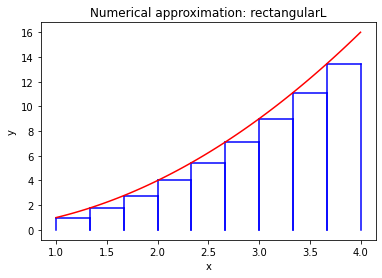

Approximation rectangularL: 18.555555555555554  error:  11.640211640211664  %


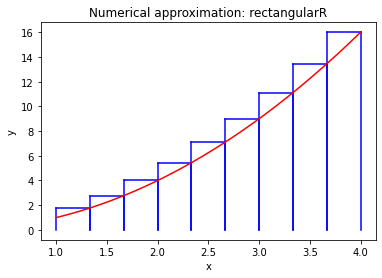

Approximation rectangularR: 23.555555555555557  error:  12.169312169312157  %


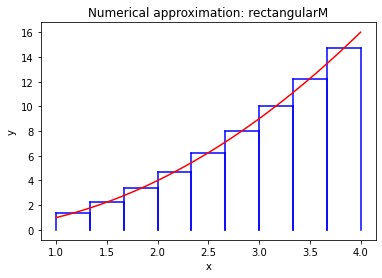

Approximation rectangularM: 20.97222222222222  error:  0.13227513227515295  %


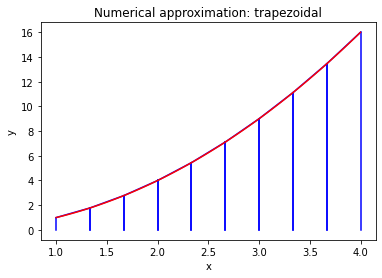

Approximation trapezoidal:  21.055555555555554  error:  0.26455026455023817  %


In [24]:
#-----------------------------Run the program----------------------------------

# Initial parameters:
    # xmin = m
    # xmax = M
    # points used = p

m = 1
M = 4
p = 10

actual = F(m,M)[0]
print('Actual area:',actual)
print('#############################################################')

recL = approximateNumerical(m,M,p,mod='rectangularL',plt_data=True)
print('Approximation rectangularL:',recL,' error: ',abs((recL-actual)/actual)*100.,' %')
recR = approximateNumerical(m,M,p,mod='rectangularR',plt_data=True)
print('Approximation rectangularR:',recR,' error: ',abs((recR-actual)/actual)*100.,' %')
recM = approximateNumerical(m,M,p,mod='rectangularM',plt_data=True)
print('Approximation rectangularM:',recM,' error: ',abs((recM-actual)/actual)*100.,' %')
trap = approximateNumerical(m,M,p,mod='trapezoidal',plt_data=True)
print('Approximation trapezoidal: ', trap,' error: ',abs((trap-actual)/actual)*100.,' %')

### **Task 3**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

# Initial function given
def f(x):
    y = np.exp(-x**2) 
    return y


# Integral of the function  calculated using scipy.integrate
def F(a,b):
    if a > b:
        raise ValueError('b must be greater than a')
    elif a == b:
        return 0
    else:
        y = integrate.quad(lambda x: f(x), a, b)
        return y

In [26]:
# Approximating function using numerical methods:
    # rectangular left, right, middle:
    #   rectangularL, rectangularR, rectangularM
    # trapezoidal
def approximateNumerical(a,b,points=10,mod='rectangularM',plt_data=False):
    if points < 2:
        raise ValueError('Number of points must be greater than 2')
    if a == b:
        return 0
    n = np.linspace(a,b,points)
    partialSum = 0
    if mod == 'rectangularM':
        def miniArea(c,d):
            return (d-c)*f((c+d)/2)
    elif mod == 'rectangularL':
        def miniArea(c,d):
            return (d-c)*f(c)
    elif mod == 'rectangularR':
        def miniArea(c,d):
            return (d-c)*f(d)                        
    elif mod == 'trapezoidal':
        def miniArea(c,d):
            return (d-c)*(f(c)+f(d))/2
    else:
        raise ValueError('Method '+mod+' unknown')
    
    for i in range(1,len(n)):
        partialSum += miniArea(n[i-1],n[i])

    if (plot_dat):
       plot_dat(a,b,points,mod)
       
    return partialSum

In [27]:
# Plotting function for a visual representation
def plot_dat(a,b,points,mod='rectangularM'):

    n = np.linspace(a,b,points)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Numerical approximation: '+mod)
    if mod == 'rectangularM':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f((c+d)/2)],color='blue')
            plt.plot([d,d],[0,f((c+d)/2)],color='blue')
            plt.plot([c,d],[f((c+d)/2),f((c+d)/2)],color='blue')

    elif mod == 'rectangularL':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f(c)],color='blue')
            plt.plot([d,d],[0,f(c)],color='blue')
            plt.plot([c,d],[f(c),f(c)],color='blue')

    elif mod == 'rectangularR':    
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f(d)],color='blue')
            plt.plot([d,d],[0,f(d)],color='blue')
            plt.plot([c,d],[f(d),f(d)],color='blue')

    elif mod == 'trapezoidal':
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([d,d],[0,f(d)],color='blue')
            plt.plot([c,c],[0,f(c)],color='blue')
            plt.plot([c,d],[f(c),f(d)],color='blue')


    n_dense = np.linspace(a,b,10*points)
    plt.plot(n_dense,f(n_dense),color='red')   
    plt.show()

    return 0

Actual area: 1.6330314810719482
#############################################################


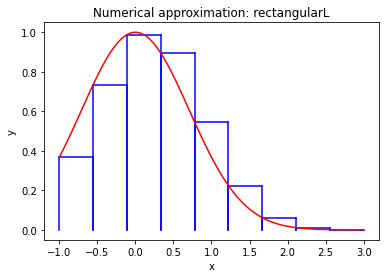

Approximation rectangularL: 1.7025539355548043  error:  4.257263579341437  %


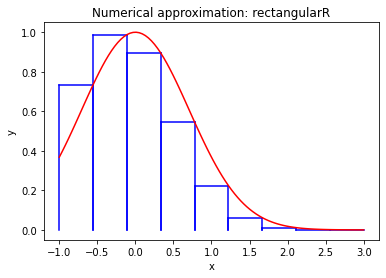

Approximation rectangularR: 1.5391068105026464  error:  5.751552965019884  %


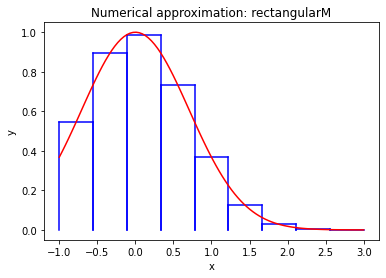

Approximation rectangularM: 1.6391610699722408  error:  0.375350320636135  %


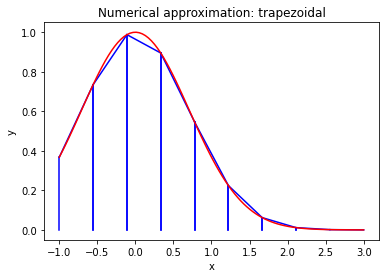

Approximation trapezoidal:  1.6208303730287252  error:  0.7471446928392304  %


In [28]:
#-----------------------------Run the program----------------------------------

# Initial parameters:
    # xmin = m
    # xmax = M
    # points used = p

m = -1
M = 3
p = 10

actual = F(m,M)[0]
print('Actual area:',actual)
print('#############################################################')

recL = approximateNumerical(m,M,p,mod='rectangularL',plt_data=True)
print('Approximation rectangularL:',recL,' error: ',abs((recL-actual)/actual)*100.,' %')
recR = approximateNumerical(m,M,p,mod='rectangularR',plt_data=True)
print('Approximation rectangularR:',recR,' error: ',abs((recR-actual)/actual)*100.,' %')
recM = approximateNumerical(m,M,p,mod='rectangularM',plt_data=True)
print('Approximation rectangularM:',recM,' error: ',abs((recM-actual)/actual)*100.,' %')
trap = approximateNumerical(m,M,p,mod='trapezoidal',plt_data=True)
print('Approximation trapezoidal: ', trap,' error: ',abs((trap-actual)/actual)*100.,' %')